In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn .preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("C:/Users/anuja/OneDrive/Desktop/position_Salary.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


### Exploratory Data Analysis (EDA)

In [6]:
data.isnull()

,Position,Level,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [7]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


We have just droped the column Position from the main dataset as it is column Level already 
have unique value for each Position.

In [30]:
X= data['Level'].values.reshape(-1,1)
y= data['Salary'].values.reshape(-1,1)

In [9]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [10]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


<Axes: xlabel='Level', ylabel='Salary'>

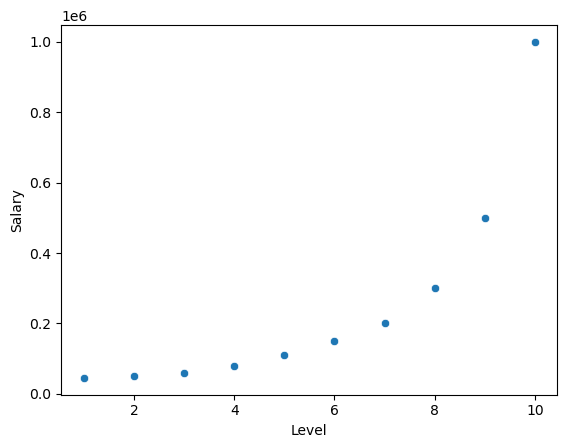

In [11]:
sns.scatterplot(x = 'Level', y = 'Salary', data = data)

### Model Building 

In [12]:
# Training the Linear Regression model on the whole dataset
lin = LinearRegression()
print("The model is loaded")

The model is loaded


In [13]:
lin.fit(X,y)
print("Training Completed")

Training Completed


## Visualising the Linear Regression results

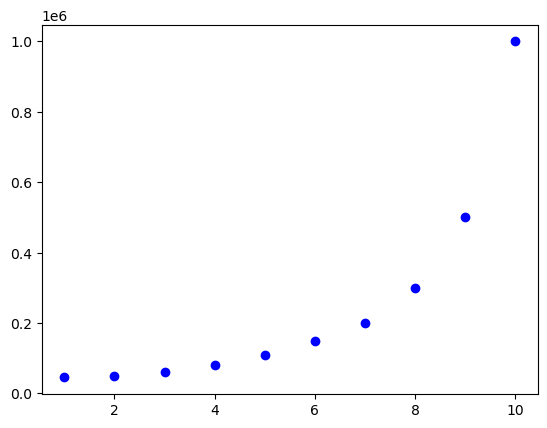

In [14]:
plt.scatter(X,y,color ='blue')

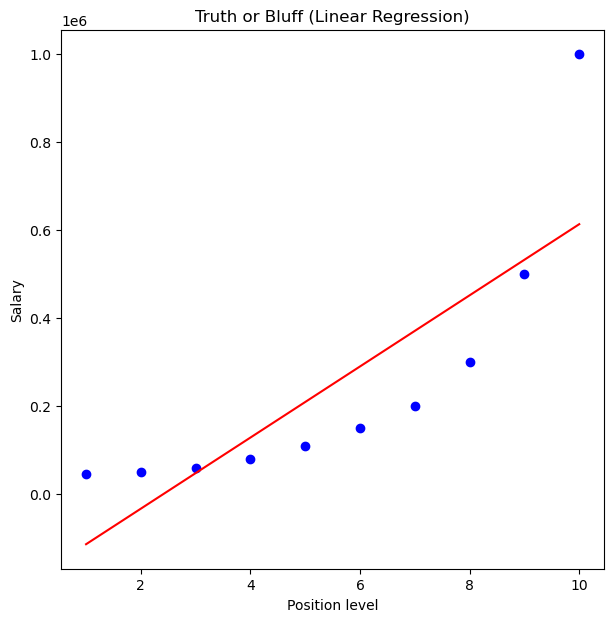

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(X,y,color = 'blue')
plt.plot(X,lin.predict(X),color ='red')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Equation
Linear: Y = mx+c Polynomial: Y=c+ m1x + m2x^2 + m3*x^3 

* If we look at the graph, we can see that person at level  6.5 should be offered a salary of around     $800k and different between predicted line red and orginal value had more gap in between.
* Well the prediction is far from  the real result here.
* So that would not be the best negotiation. So that linear regression model is not well adapted.

In [16]:
lin.predict([[6.5]])

array([330378.78787879])

We can see that the prediction is way off as it predicts $330k. Now lets check the predictions by 
implementing Polynomial Regression

### Training the Polynomial Regression model on the whole dataset

In [17]:
poly = PolynomialFeatures(degree = 3)
print("Loaded the Polynomial Features")

Loaded the Polynomial Features


In [18]:
X_poly = poly.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [19]:
poly.fit(X_poly,y)
print("polynomial Features is fitted and Trained")

polynomial Features is fitted and Trained


In [20]:
lin2 = LinearRegression()

In [21]:
lin2.fit(X_poly,y)
print("The Model is trained using Polynomial Features")

The Model is trained using Polynomial Features


#### Visualising the Polynomial Regression results

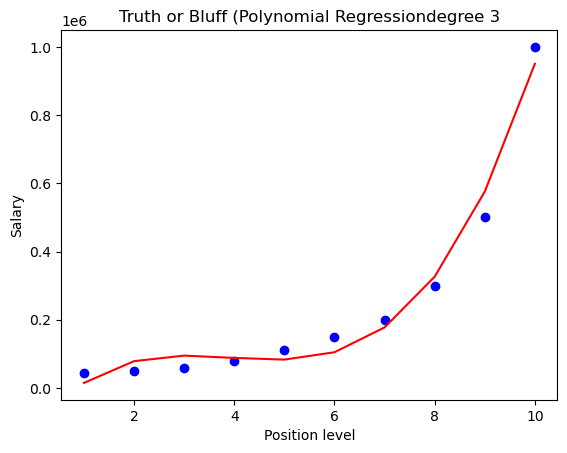

In [22]:
plt.scatter(X,y,color = 'blue')
plt.plot(X,lin2.predict(poly.fit_transform(X)),color ='red')
plt.title('Truth or Bluff (Polynomial Regressiondegree 3')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [23]:
# lets try for higher degree polynomial. very simple to do, we just have to change the degree parameter.
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)

LinearRegression()

#### Visualising the Polynomial Regression results

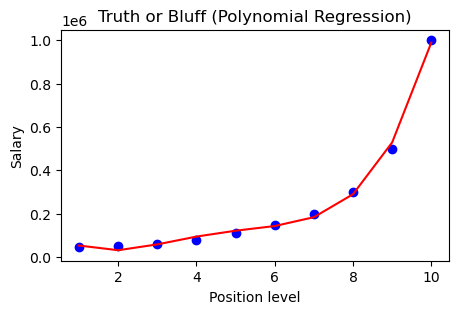

In [24]:
plt.figure(figsize=(5,3))
plt.scatter(X,y,color = 'blue')
plt.plot(X,lin2.predict(poly.fit_transform(X)),color ='red')
plt.title('Truth or Bluff (Polynomial Regression)') #change form  3 to 4
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

* If we look at the graph, we can see that a person at level 6.5 should be offered a salary of around $190k.

### Model Evaluation

#### Rsquare value for Linear Regression

In [25]:
r2_score(y,lin.predict(X))

0.6690412331929895

#### Rsquare value for Polynomial Regression

In [26]:
r2_score(y,lin2.predict(X_poly))

0.9973922891706614

In [31]:
lin2.predict(poly.fit_transform([[6.5]]))

array([158862.45265153])

* By using Polynomial Regression, the predicted salary is one hundred and fifty eight. Well actually one hundred fifty nine thousand dollars which is super close to the salary mentioned by this person.

* using Linear regression model.we got the prediction of 330k and by useing polynomial regression we got the prediction 158k. we got predict that polynomial regression is more resonable.